# TP 2 : Computer Vision

## Part 1 : segmentation

In this part of the TP, we are going to implement two approaches to image segmentation :

- algorithm of Otsu (histogram-based segmentation)
- a simple region-growing based algorithm

First, let us load some packages and define some helper functions (as in the previous TP)

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

file_dir = 'images/'
file_name = 'crossing'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
display_image(img_gray)
img_gray.shape

(800, 586)

## Otsu's algorithm

Otsu's method is based on finding a threshold to split the image into two separate segments, based simply on their grey-level values. Since the maximum number of grey-levels is finite (and small, 256), we can use an exhaustive search.

The grey-level threshold is the one that minimises the following criterion :

$argmin_{\tau} \omega_0(\tau)\sigma_0(\tau) + \omega_1(\tau)\sigma_1(t)$

where

- $\sigma_0(\tau)$ and $\sigma_1(\tau)$ are the variances of the pixels in the first and second regions
- $\omega_0(\tau)$ and $\omega_1(\tau)$ are weights of the first and second regions

and 

- $\omega_0(\tau) = \sum_{p \in \Omega} \mathbb{1}_{\tau}(I(p)), \qquad$
- $\omega_1(\tau) = \sum_{p \in \Omega} 1-\mathbb{1}_{\tau}(I(p))$

and 

$\mathbb{1}_{\tau}(I(p)) =\begin{cases}
        1 \; \text{if} \: I(p)<=\tau\\
        0 \; \text{otherwise}
\end{cases}$

Implement this algorithm in a function called ``segmentation_otsu``. Note : only analyse thresholds which produce two distinct regions : you cannot have a region with no pixels. Furthemore, remember that the image is normalised between 0 and 1, with 256 discrete values. Choose the threshold values accordingly.

In [2]:
# This function returns the segmentation of the algorithm of otsu, as well as the threshold found
def segmentation_otsu(img):
    """ Function which calculates from the histogram the best segmentation, finding the best threshold from the different values"""
    pixel_number = img.shape[0] * img.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(img, np.linspace(0,1,256))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(255)
    for t in range(256):
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t/255
            final_value = value
    final_img = img.copy()
    print(final_thresh)
    final_img[img > final_thresh] = 1
    final_img[img < final_thresh] = 0
    return final_img,final_thresh

Carry out the segmentation on the input image and display the result

C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


0.6392156862745098


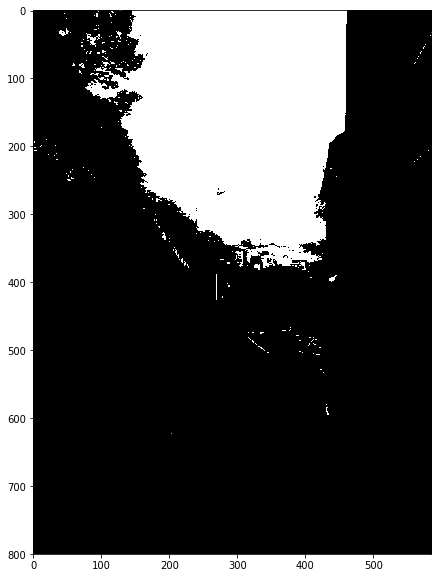

In [3]:
img_out_otsu,tau = segmentation_otsu(img_gray)
display_image(img_out_otsu)
write_image(img_out_otsu,file_name+'_segmentation_otsu.png')

__Question__ What problem can you see with the segmentation result ? What morphological technique(s) (seen in the lesson) could you use to clean the result up ? 

__Answer__  This method is entirely based on pixel values so it doesn't take into account the geometric aspect of objects in the image. In order to clean the result up, we could use region growing methods.

Carry out this technique to clean up the output image, and imwrite the result. You can find the necessary function(s) in the following package :

skimage.morphology

Choose the neighbourhood parameter of the functions to obtain the best results.

C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


0.6392156862745098


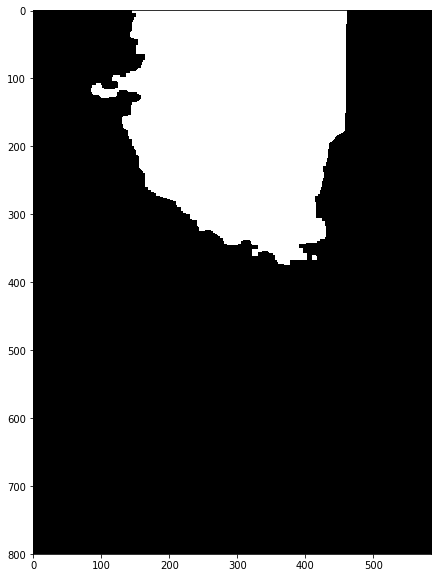

In [4]:
from skimage.morphology import opening, closing, square

struct_size = 7
struct_el = np.ones((struct_size,struct_size))
img_out_otsu,tau = segmentation_otsu(img_gray)
img_cleaned = opening(img_out_otsu,square(6))
img_cleaned_bis = closing(img_cleaned,square(6))
img_out_otsu_cleaned = img_cleaned_bis

display_image(img_out_otsu_cleaned)
write_image(img_out_otsu_cleaned,file_name+'_segmentation_otsu_cleaned_1.png')

__Question__ In which order did you propose to carry out the morphological operations ? Why ?

__Answer__ First the opening then the closing. Indeed, the opening removes the small white dots and closing removes small dark dots.

Let's change the image, and carry out the segmentation again.

C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Alphonse\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


0.4980392156862745


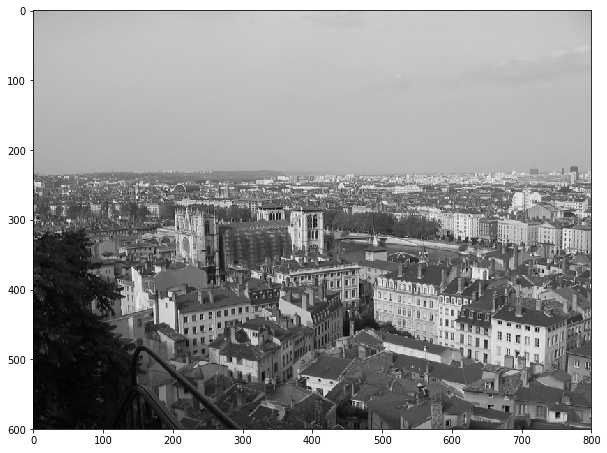

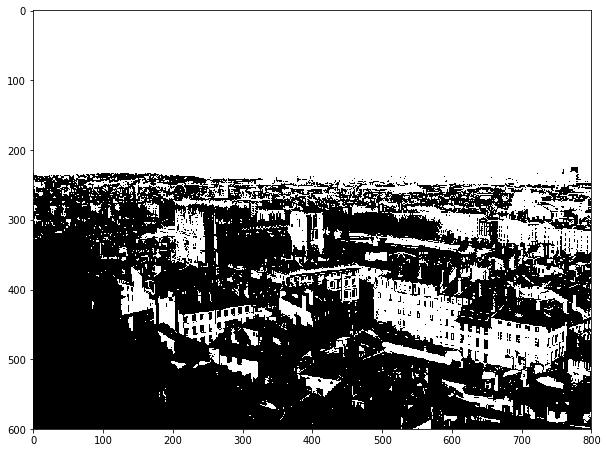

In [5]:
file_name = 'town'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
display_image(img_gray)
img_gray.shape

img_out_otsu,tau = segmentation_otsu(img_gray)
display_image(img_out_otsu)
write_image(img_out_otsu,file_name+'_segmentation_otsu.png')

As we can see, there is no notion of connectivity in the algorithm of Otsu (two regions far away can be in the same segment). For such a notion, we turn to region merging.

## Region merging

The region merging algorithm is quite simple : we start with a small region, and add new pixels progressively to the region. More precisely, at each iteration of the algorithm, we attempt to add the neighbours of the pixels in the current segmentation. We add new pixels according to the criterion :

- $I(p)$ is added to the region if the absolute difference between the pixel value and the region's average value is less than a threshold value (which you must set).

First, create a function called ``initialize_segmentation`` which initialises the segmentation with a small circular region centred on a given seed point (the seed point is an input). For this, the following function :

- scipy.ndimage.morphology.distance_transform_edt

can be useful.

In [7]:
from scipy.ndimage.morphology import distance_transform_edt

def initialize_segmentation(seed_pt,img_shape):
    seg_init = np.zeros(img_shape)
    seg_init[seed_pt[0]-5:seed_pt[0]+5,seed_pt[1]-5:seed_pt[1]+5] = 1
    return seg_init

Now, create a function called ``segmentation_region_growing`` which carries out the region growing algorithm, with the criterion above, and which uses the ``initialize_segmentation`` function. Again, the functions from ``scipy.ndimage.morphology`` can be useful here.

__IMPORTANT NOTE__ Once a pixel has been added to the region, it is in the region permanently : it is not checked again in further iterations (otherwise we could remove pixels which were added).

In [14]:
from scipy.ndimage import binary_dilation

# This function returns both the final segmentation and the initialisation
def segmentation_region_growing(img,seed_pt,tau):
    img_shape = img.shape
    seg_init = initialize_segmentation(seed_pt,img.shape)
    reg_val= img[seg_init>0].sum()/(seg_init>0).sum()
    new_values_test = (binary_dilation(seg_init,iterations = 1)>0)
    new_values_test = new_values_test - seg_init
    new_seg = np.copy(seg_init)
    for i in range(new_values_test.shape[0]):
        for j in range(new_values_test.shape[1]) :
            if (new_values_test[i][j] == 1) :
                if (np.abs(img[i][j] - reg_val) < tau) :
                    new_seg[i][j] = 1
    old_seg = np.copy(seg_init)
    while((new_seg-old_seg).sum()>0) :
        old_seg = new_seg
        reg_val = img[new_seg>0].sum()/(new_seg>0).sum()
        new_values_test = (binary_dilation(new_seg,iterations = 1)>0)
        new_values_test = new_values_test - new_seg
        new_seg = np.copy(new_seg)
        print('ok')
        print(reg_val)
        for i in range(new_values_test.shape[0]):
            for j in range(new_values_test.shape[1]) :
                if (new_values_test[i][j] == 1) :
                    if (np.abs(img[i][j] - reg_val) < tau) :
                        new_seg[i][j] = 1
    return new_seg,seg_init

Carry out the segmentation on the input image with the seed point and threshold specified in the following code :

ok
0.7377330280112046
ok
0.7374976896845694
ok
0.7373533265720081
ok
0.7373956793703397
ok
0.7374576770472895
ok
0.7375848372549021
ok
0.7376911933739013
ok
0.7377851850213769
ok
0.7377775801843917
ok
0.737770789504037
ok
0.7377779628482971
ok
0.7377905519933091
ok
0.7378237839771102
ok
0.7378804185814951
ok
0.7378923154761905
ok
0.7379478174220507
ok
0.7380112682897932
ok
0.7380448715631504
ok
0.7380789845575535
ok
0.7381171769430663
ok
0.7381686666666666
ok
0.7382761237436152
ok
0.7383325384051258
ok
0.7383703062592875
ok
0.7384129057118499
ok
0.7384984721954355
ok
0.7385591220482001
ok
0.7386231808916831
ok
0.7386692122868564
ok
0.7387187118163054
ok
0.7387807487745098
ok
0.7388511510573313
ok
0.7389095209068905
ok
0.7389487936729767
ok
0.7389635333535476
ok
0.7390237146720757
ok
0.7390765052392304
ok
0.7391293818574362
ok
0.7391656058755682
ok
0.7391884631030835
ok
0.7392221666276072
ok
0.7392788112932769
ok
0.739332429899795
ok
0.7393670983588332
ok
0.7394047461687745
ok
0.7394455

ok
0.7387142647820988
ok
0.7386909884429959
ok
0.7386666570158701
ok
0.7386400149575019
ok
0.7386139661561848
ok
0.7385905073753045
ok
0.7385662916883986
ok
0.7385430872773984
ok
0.7385205939347165
ok
0.738500877890533
ok
0.7384811533375123
ok
0.7384627562414543
ok
0.7384442237802163
ok
0.738423913336327
ok
0.7384050364779893
ok
0.7383855394928132
ok
0.7383648540620306
ok
0.7383418580422109
ok
0.738320621328873
ok
0.7383010593801594
ok
0.7382819033967698
ok
0.7382627789427031
ok
0.7382461936286808
ok
0.7382288246215452
ok
0.7382130244054156
ok
0.7381986686261435
ok
0.738184101246628
ok
0.7381702758799435
ok
0.7381560747422958
ok
0.7381399210737172
ok
0.7381239098645822
ok
0.7381093419448866
ok
0.7380959949993289
ok
0.7380835969571977
ok
0.7380719847321374
ok
0.7380605238234665
ok
0.7380504762037949
ok
0.7380404565877968
ok
0.7380298309723714
ok
0.7380198198241882
ok
0.7380097978934228
ok
0.7380004789568562
ok
0.7379931072579827
ok
0.7379855821973841
ok
0.7379790390977014
ok
0.737974032

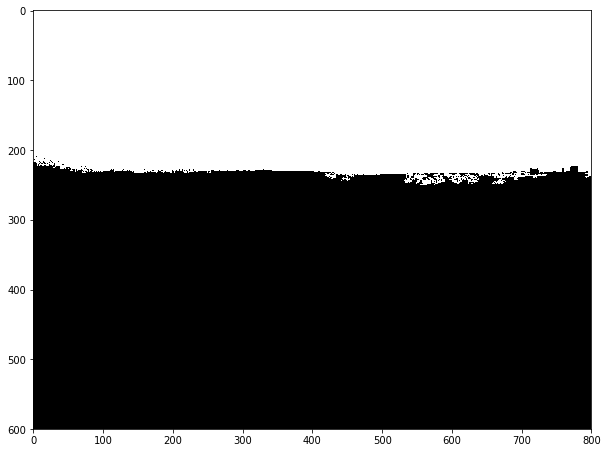

In [15]:
seed_pt = np.asarray([130,350])
tau = 20.0 * (1.0/256.0)
img_out_region_growing,seg_init = segmentation_region_growing(img_gray,seed_pt,tau)
display_image(img_out_region_growing)
write_image(seg_init,file_name+'_segmentation_region_growing_init.png')
write_image(img_out_region_growing,file_name+'_segmentation_region_growing.png')